Brandon Roemer and Vincent Liu

# LTSM on predicting opening price of a specific stock
  

Our Project is about predicting the opening price of a particular stock on the next given day. We are using supervised learning with regression with the LTSM model. This project is important to help give more accurate resaults of stock opening price of what is to come and to practice  implementation of an LTSM in a real life circumstance. In this case to represent its capability we compare it to a simlpe random forest model. One of our main goals to write something that could be understood on a basic level by non-computer science oriented peope and have our resualts replicated. 

In [15]:
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


from sklearn.ensemble import RandomForestRegressor


In [2]:
#Quick Normalization function from 0 to 1
def norm(x):
    ret = []
    s = sum(x)
    
    for i in x:
        ret.append(i/s)
    return ret
        
    

In [3]:
#Read In Data 
Human_Df = pd.read_csv("CleanDataHuman.csv")
Human_Df = Human_Df.drop(["Ticker"]
Human_Df.head()

#Re-Scale Human Data (Normalize)
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(np.array(Human_Df.values))
trans = scaler.transform(Human_Df)
print("transformed2:\n", trans[:,0])


y = trans[1:,0]
X = trans[:-1,1:]
print(X.shape)
print(y.shape)
data = pd.read_csv('CleanData.csv') 
data.head()

transformed2:
 [0.03173981 0.03109858 0.03147166 ... 0.85805457 0.85484841 0.85543135]
(11331, 4)
(11331,)


,Open,High,Low,Close,Volume,Open.1,High.1,Low.1,Close.1,Volume.1,Open.2,High.2,Low.2,Close.2,Volume.2,Open.3,High.3,Low.3,Close.3,Volume.3
0,0.211573,0.207278,0.266271,0.207774,0.040335,0.317724,0.316066,0.314614,0.315107,0.014362,0.221744,0.221735,0.219592,0.218835,0.071630,0.121008,0.120398,0.120547,0.121613,0.265755
1,0.207299,0.205954,0.268285,0.211104,0.020598,0.313595,0.312520,0.313730,0.316131,0.005885,0.216649,0.221677,0.222476,0.225798,0.064605,0.119878,0.121420,0.124930,0.127285,0.215039
2,0.209786,0.204670,0.267314,0.208549,0.020888,0.310289,0.307719,0.308843,0.307302,0.008160,0.217424,0.217205,0.220296,0.218899,0.031678,0.124445,0.119637,0.127240,0.125837,0.218488
3,0.206949,0.205098,0.267961,0.209943,0.032848,0.304350,0.303431,0.307455,0.307065,0.016842,0.216899,0.217857,0.221881,0.220296,0.035793,0.124038,0.120821,0.128372,0.126066,0.164931
4,0.208620,0.205293,0.268213,0.209400,0.077209,0.305648,0.304895,0.307398,0.308051,0.003199,0.219603,0.218163,0.222712,0.221599,0.059641,0.124868,0.122011,0.128281,0.127560,0.189904


In [18]:
#Initial Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 1234)

X_train = np.array(X_train)
X_test = np.array(X_test)




#Custom Test Train split for better graphs
print(type(trans))
trans = np.array(trans)

#add index column
#index = np.arange(0,len(X))
#X = np.append(X, index, 1)
#print(x.shape)

train_len = 2 * int(len(X)/3)

#Generate random indicies without replacement
np.random.RandomState(seed = 1234)
X_train_ind = np.random.choice(len(X), train_len, replace=False)

#Generate test train
X_train, y_train = [], []
X_test , y_test = [], []

for i in range(len(X)):
    if i in X_train_ind:
        X_train.append(X[i])
        y_train.append(y[i])
    else:
        X_test.append(X[i])
        y_test.append(y[i])


X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train_RF, y_train_RF = X_train, y_train
X_test_RF, y_test_RF = X_test, y_test

X_train = np.reshape(X_train, [X_train.shape[0], 1, X_train.shape[1]])
X_test = np.reshape(X_test, [X_test.shape[0], 1,  X_test.shape[1]])
print(X_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'>
(7554, 1, 4)
(7554,)


## Models

We used two models for comparison. 

### Colinearity
    Due to the lack of features and the time it took to train the data is so short, we decided to use all of the cleaned data. We have determined that opening price and closing price are closely related (as seen in the feature importance graph below); However not completely depedent on each other. 
  
### Feature Engineering
    In this specific case we could not do very much feature engineering as our data only had 5 features, 4 of which were very relevent to the scenario.
    
### Hyperparam Tuning
    We focused on tuning our LTSM however because of how accurate it was we found it was best to have a very simple model to increase runtime. Some methods we tried are increase the numbe of layers of ltsm and splitting up the nodes, increase the window size, and chaning the number of LTSM nodes per layer and changing loss and optimization options. 

### Regularization
    In order to get our data to properly function within an LTSM we MinMaxNormalized the input and inversed it when conducting our analysis/resaults on the data. This is to help increase the performance and to prevent weights from becoming to large or too small.
    
### Data Imbalance
    In our case we didnt run into very much over fitting as our test and train were both very accurate as seen below, which is one of the resasons we stuck with a simple model.
    

In [19]:
#RF comparison Model
model = RandomForestRegressor()
model.fit(X_train_RF, y_train_RF)

model.score(X_test_RF, y_test_RF)

0.9978759833755158

[5.44837663e-02 9.06178376e-02 8.54748858e-01 1.49537844e-04]


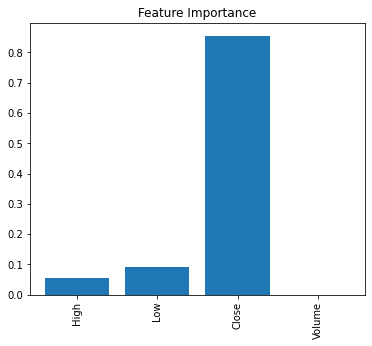

In [22]:
#basic feature importance for RF model 
print(model.feature_importances_)
#print(np.array(X.columns))
#plt.plot( range(1,len(model.feature_importances_)+1),model.feature_importances_)
fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.bar(["High", "Low", "Close", "Volume"], model.feature_importances_)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.title("Feature Importance")
plt.savefig('K1_Feature_Importance.png')

In [5]:
#Create LTSM Model 
model = Sequential()
model.add(LSTM(10, input_shape=(1, 4)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 38s - loss: 0.0030
Epoch 2/100
 - 56s - loss: 1.2214e-04
Epoch 3/100
 - 50s - loss: 1.1969e-04
Epoch 4/100
 - 37s - loss: 1.1546e-04
Epoch 5/100
 - 21s - loss: 1.1423e-04
Epoch 6/100
 - 21s - loss: 1.1531e-04
Epoch 7/100
 - 24s - loss: 1.1457e-04
Epoch 8/100
 - 21s - loss: 1.1474e-04
Epoch 9/100
 - 21s - loss: 1.1567e-04
Epoch 10/100
 - 22s - loss: 1.1320e-04
Epoch 11/100
 - 22s - loss: 1.1400e-04
Epoch 12/100
 - 22s - loss: 1.1385e-04
Epoch 13/100
 - 23s - loss: 1.1418e-04
Epoch 14/100
 - 24s - loss: 1.1651e-04
Epoch 15/100
 - 24s - loss: 1.1376e-04
Epoch 16/100
 - 25s - loss: 1.1345e-04
Epoch 17/100
 - 30s - loss: 1.1654e-04
Epoch 18/100
 - 38s - loss: 1.1261e-04
Epoch 19/100
 - 28s - loss: 1.1463e-04
Epoch 20/100
 - 27s - loss: 1.1265e-04
Epoch 21/100
 - 26s - loss: 1.1689e-04
Epoch 22/100
 - 24s - loss: 1.1063e-04
Epoch 23/100
 - 23s - loss: 1.1637e-04
Epoch 24/100
 - 23s - loss: 1.0947e-04
Epoch 25/100
 - 22s - loss: 1.1056e-04
Epoch 26/100
 - 22s - loss: 1.1197e-04

## Resaults and Analysis

### Summary
    Both the Random Forest and LTSM performed very well. We used a variety of metrics to score them. For the Random forest we used the score method to get a baseline of what a good performance would look like with a score of .997. For the LTSM we had a very low RMSE for both train and test and when they are grouped together it is very clear they the model does a very good job of predicting what will happen (note the actual data is shifted down slightly to show both lines) We also calculated the percent error for any given amount of error within our data and its very close to an L shape indicating that a vast majority of our error is 0 or very close to 0. 
    
### Iteration/Evaluation
    As seen above we run 100 epochs on our data slowely approaching lower amount of loss through the use of Mean Squared Error, calculated by hand below. 
    
### Visualization
    To help visualize the results of our LTSM we included graphs of the error described above, a graph of the model itself and of graph of the prediction accuracies compared to the actual values. 
    

### Comparison 
    Using our Random Forest as a basline it is apparent for data of this nature that something like a LTSM is not as required. Both models score very well (as explained above); However the random forest is much simpler and although we are working with time, both models still do a very good job of fitting. In this case it is hard to make a strong argument for using LTSM for this specific data in this way as a simple Random forest can do it faster, simpler and with a very similar amount of accuracy.
    

In [9]:
#Calculate RMSE

y_train = np.array(y_train)
y_test = np.array(y_test)

#Re-Create Scalar to Un-MinMaxScale for just Y (Note it is the same values as if we did it for all features)
unTransformed_data = np.array(Human_Df["Open"]).reshape(-1, 1)

scaler = MinMaxScaler()
scaler.fit(unTransformed_data)

#Predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)


#Inverse Predictions and Test/Train

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

#Calc RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))




Train Score: 1.68 RMSE
Test Score: 1.24 RMSE


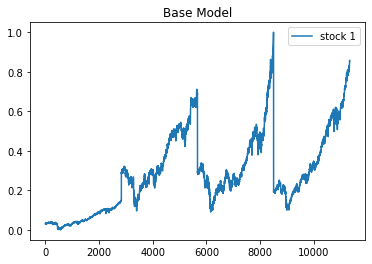

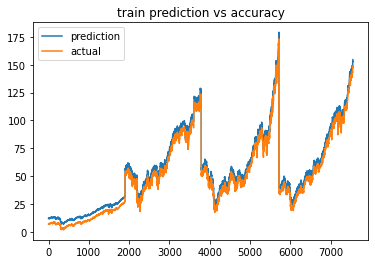

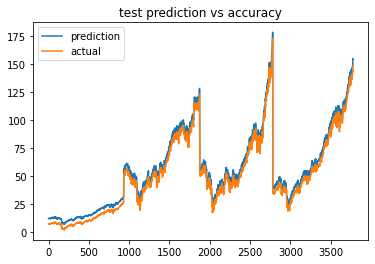

In [14]:
#TODO: Graph of full prediction

plt.plot(y, label = "stock 1")
plt.title("Base Model")
plt.legend()
plt.show()

plt.plot(trainPredict[:,0], label = "prediction")
plt.plot(trainY[0]-5, label = "actual")
plt.title("train prediction vs accuracy")
plt.legend()
plt.show()

plt.plot(testPredict[:,0], label = "prediction")
plt.plot(testY[0]-5, label = "actual")
plt.title("test prediction vs accuracy")
plt.legend()
plt.show()

3777
[ 12.014  11.941  11.988 ... 148.02  153.26  153.36 ]
137.27454243230972


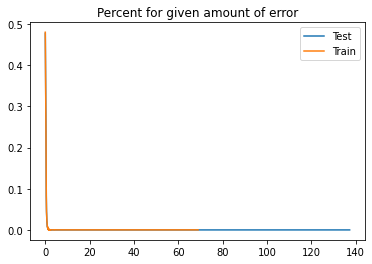

In [11]:
#Graph RMSE

te_diff = []
tr_diff = []
i , j=0 , 0

#Calc y_act - y_pred
for i in range(len(trainY[0])):
    te_diff.append((trainY[0][i] -trainPredict[i, 0])**2)
print(len(testY[0]))
j = 0
for j in range(len(testY[0])):
    tr_diff.append((testY[0][j] -testPredict[j, 0])**2)
    
#RMSE
print(max(testY))
te_RMSE = np.sqrt(np.around(te_diff,decimals = 1))
tr_RMSE = np.sqrt(np.around(tr_diff,decimals = 1))

print(max(te_RMSE))
#Get unique counts
te_poss, te_counts = np.unique(te_RMSE, return_counts = True)
tr_poss, tr_counts = np.unique(tr_RMSE, return_counts = True)

#Normalize counts (0 to 1)
te_counts = norm(te_counts)
tr_counts = norm(tr_counts)

#Plot
plt.plot(te_poss,te_counts, label = "Test")
plt.plot(tr_poss, tr_counts, label = "Train")
plt.title("Percent for given amount of error")
plt.legend()
plt.show()

## Conclusion/Discussion

### Results (reiterated)
    Overall, while we found that both models were very good, it is quite clear that a simple model, such as Random Forest in this case, is far superior to use as it is simpler, faster, and easier to use and measure. 

### Learning and Takeaways
    We both learned alot from this project. In a broad sense from creating the entire repository and meeting simple standards that come along with it, to the fine grain of data proccessing and creating models that are more than just numbers, but applicable (readable) to a larger audience.

### Areas for improvment
    It would seem that our data was a bit "too easy" in the sense that both models with very little change could fit the data very well and the data had very few features making things like feature importance and collinearity very difficult do deal with or show our skills in that department. 
        
    Next time we would change our project to maybe train on a group of stocks and the predict other stocks not within that group, thus increasing the difficulty and hopefully the gap between our models, allowing us to do more with each model in terms of hyperpamaters, overfitting, feature engineering etc. I believe given more time we could execute this plan with an better idea of what this project actually required. 